<a href="https://colab.research.google.com/github/nived02/MultiOmics/blob/main/MultiOmics_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 6 (15 points)**
Random DNA codes for protein?. An oligonucleotide sequence T T T T AAAA is known to occur

in the protein-coding regions of a bacterial B genome with a frequency of 0.008. This exact se-
quence T T T AAAA also appears in the non-coding regions (which do not code for proteins) with

frequency 0.003. You come across a 400-not-long DNA fragment where T T T T AAAA occurs 4
times. A random 400 nt sequence can originate from protein-coding regions with a probability of
0.8. How likely is it that this 400nt sequence is from a protein-coding region given it is now known
that it also has 4 occurrences of T T T T AAAA?

In [25]:
from scipy.stats import poisson

# Given values
p_coding = 0.8
p_non_coding = 1 - p_coding

freq_coding = 0.008
freq_non_coding = 0.003

occurrences = 4
length_sequence = 400

# Calculate Poisson probabilities for the coding and non-coding regions
lambda_coding = freq_coding * length_sequence
lambda_non_coding = freq_non_coding * length_sequence

P_X_given_coding = poisson.pmf(occurrences, lambda_coding)
P_X_given_non_coding = poisson.pmf(occurrences, lambda_non_coding)

# Apply Bayes' theorem
posterior_prob = (P_X_given_coding * p_coding) / (P_X_given_coding * p_coding + P_X_given_non_coding * p_non_coding)

print(f"The probability that the sequence is from a protein-coding region is approximately {posterior_prob:.4f} or {posterior_prob * 100:.2f}%.")


The probability that the sequence is from a protein-coding region is approximately 0.9648 or 96.48%.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import subprocess
import sys

# List of packages to check and install
packages = ['pandas', 'seaborn']  # Replace with equivalent Python packages

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check for each package
for package in packages:
    try:
        __import__(package)
    except ImportError:
        install(package)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style for publication-quality figures
sns.set_style("whitegrid")  # Adjust as needed to mimic publication-quality appearance

# Function to filter DataFrame to only retain specific statuses
def filter_data(df):
    df = df[df['Status'].isin(['Chromosome', 'Complete Genome', 'Scaffold'])]
    return df

In [ ]:
import pandas as pd

# Read TSV files into DataFrames
eukaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt", sep='\t')
prokaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt", sep='\t')
viruses = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/viruses.txt", sep='\t')

# Create a new column 'Size (Mb)' in the viruses DataFrame
viruses['Size (Mb)'] = viruses['Size (Kb)'] / 1000

# Print the head of each DataFrame to check
print(eukaryotes.head())
print(prokaryotes.head())
print(viruses.head())

<ipython-input-13-844c25e747c2>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt", sep='\t')


               #Organism/Name   TaxID BioProject Accession  BioProject ID  \
0        Neopyropia yezoensis    2788          PRJNA589917         589917   
1  Emiliania huxleyi CCMP1516  280463           PRJNA77753          77753   
2        Arabidopsis thaliana    3702           PRJNA10719          10719   
3                 Glycine max    3847           PRJNA19861          19861   
4        Solanum lycopersicum    4081             PRJNA119            119   

      Group        SubGroup  Size (Mb)      GC% Assembly Accession  \
0     Other           Other    107.591  64.8454    GCA_009829735.1   
1  Protists  Other Protists    167.676     64.5    GCA_000372725.1   
2    Plants     Land Plants    119.669  36.0529    GCA_000001735.2   
3    Plants     Land Plants    978.942  35.1221    GCA_000004515.5   
4    Plants     Land Plants    827.963  35.6925    GCA_000188115.4   

                                           Replicons     WGS  Scaffolds  \
0  chromosome 1:CM020618.1; chromosome 2:

In [ ]:
import pandas as pd

# Read TSV files into DataFrames
eukaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt", sep='\t')
prokaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt", sep='\t')
viruses = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/viruses.txt", sep='\t')

# Create a new column 'Size (Mb)' in the viruses DataFrame
viruses['Size (Mb)'] = viruses['Size (Kb)'] / 1000

# Add 'taxon' column to each DataFrame
prokaryotes['taxon'] = "Prokaryote"
viruses['taxon'] = "Virus"
eukaryotes['taxon'] = "Eukaryote"

# Combine all DataFrames into one
all_data = pd.concat([prokaryotes, viruses, eukaryotes])

# Function to filter DataFrame to retain specific statuses
def filter_data(df):
    return df[df['Status'].isin(['Chromosome', 'Complete Genome', 'Scaffold'])]

# Filter the combined DataFrame
data_filtered = filter_data(all_data)

# Convert 'Genes' column to numeric, errors='coerce' will handle conversion issues
data_filtered['Genes'] = pd.to_numeric(data_filtered['Genes'], errors='coerce')

# Remove rows with missing 'Genes' or 'Size (Mb)' values
data_filtered = data_filtered.dropna(subset=['Genes', 'Size (Mb)'])

# Print the head of the filtered DataFrame to check
print(data_filtered.head())


<ipython-input-14-d0255537602e>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt", sep='\t')


                                      #Organism/Name    TaxID  \
0  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   192222   
1                            Pseudomonas fluorescens      294   
2                 Xanthomonas campestris pv. raphani   359385   
3  Salmonella enterica subsp. enterica serovar Ty...    99287   
4                              Yersinia pestis A1122  1035377   

  BioProject Accession  BioProject ID             Group  \
0               PRJNA8              8  Campylobacterota   
1           PRJEB22404         401622    Pseudomonadota   
2          PRJNA641237         641237    Pseudomonadota   
3             PRJNA241            241    Pseudomonadota   
4           PRJNA67155          67155    Pseudomonadota   

                SubGroup  Size (Mb)      GC%  \
0  Epsilonproteobacteria    1.64148     30.5   
1    Gammaproteobacteria    6.51155       60   
2    Gammaproteobacteria    4.94204     65.3   
3    Gammaproteobacteria    4.95138  52.2171   
4    Gammaprot

<ipython-input-14-d0255537602e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Genes'] = pd.to_numeric(data_filtered['Genes'], errors='coerce')


# Problem 7(a): Plot the distbution of Genes (5 points)

- Which column represents the number of genes in the dataset?
- Plot a histogram of the log10(number of genes) in the dataset
- Calculate the summary of number of genes in the dataset

Index(['#Organism/Name', 'TaxID', 'BioProject Accession', 'BioProject ID',
       'Group', 'SubGroup', 'Size (Mb)', 'GC%', 'Replicons', 'WGS',
       'Scaffolds', 'Genes', 'Proteins', 'Release Date', 'Modify Date',
       'Status', 'Center', 'BioSample Accession', 'Assembly Accession',
       'Reference', 'FTP Path', 'Pubmed ID', 'Strain', 'taxon', 'Size (Kb)',
       'Host', 'Segmemts'],
      dtype='object')


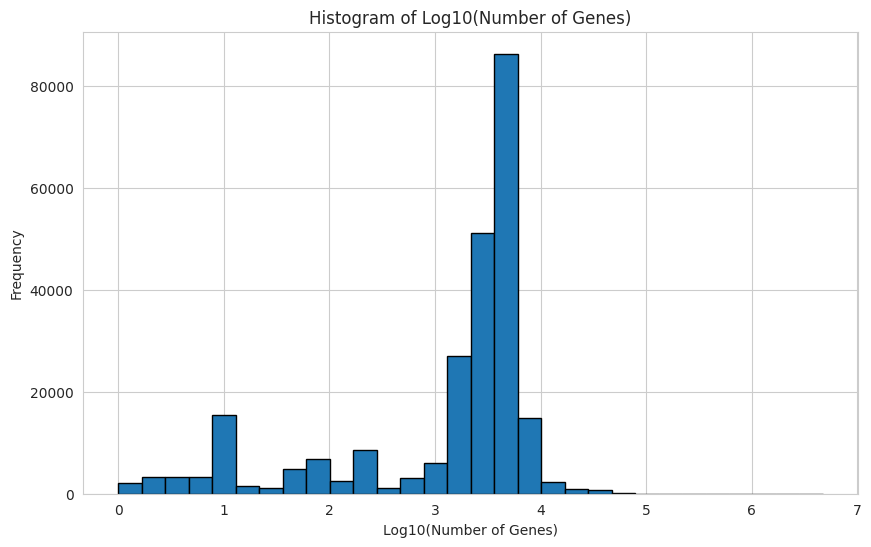

count    2.462190e+05
mean     3.357388e+03
std      1.491968e+04
min      1.000000e+00
25%      1.176500e+03
50%      2.956000e+03
75%      4.798000e+03
max      4.736081e+06
Name: Genes, dtype: float64


In [ ]:
# Print column names to identify the column for the number of genes
print(data_filtered.columns)

# For this example, we'll assume the column name is 'Genes' based on previous code
number_of_genes_column = 'Genes'

# Plot histogram of log10(number of genes)
plt.figure(figsize=(10, 6))
plt.hist(np.log10(data_filtered[number_of_genes_column]), bins=30, edgecolor='black')
plt.title('Histogram of Log10(Number of Genes)')
plt.xlabel('Log10(Number of Genes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate summary statistics of the number of genes
summary_stats = data_filtered[number_of_genes_column].describe()

# Print summary statistics
print(summary_stats)

# Problem 7(b): Determine the 99.5% quantile of number of genes (5 points)

As you notice from the dataset most organism have <1e5 genes. There are some outlier species with very high number of genes (>1e6).
These are not real and are annotation artifacts. We want to first calculate what is the 99.5 percentile of the number of genes - it is a number such that 99.5% of the entries in our dataset are below this number. This will guard us against potential outliers.

In [ ]:
number_of_genes_column = 'Genes'

# Calculate the 99.5% quantile of the number of genes
quantile_995 = data_filtered[number_of_genes_column].quantile(0.995)

# Print the 99.5% quantile
print(f"The 99.5% quantile of the number of genes is: {quantile_995}")

The 99.5% quantile of the number of genes is: 22439.74000000005


# Problem 7(c): Filter out dataset (5 points)

We will now use the `ngenes_995percentile` and retain only entries where the number of genes is below this number. We will store our results in a new dataframe `data.ultrafiltered`

In [ ]:
number_of_genes_column = 'Genes'

# Calculate the 99.5% quantile of the number of genes
quantile_995 = data_filtered[number_of_genes_column].quantile(0.995)

# Filter the dataset to retain only entries with number of genes below the 99.5% quantile
filtered_data = data_filtered[data_filtered[number_of_genes_column] <= quantile_995]

# Print the head of the filtered DataFrame to check
print(filtered_data.head())

# Optionally, print the shape to see how many entries were retained
print(f"Number of entries below the 99.5% quantile: {filtered_data.shape[0]}")

                                      #Organism/Name    TaxID  \
0  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   192222   
1                            Pseudomonas fluorescens      294   
2                 Xanthomonas campestris pv. raphani   359385   
3  Salmonella enterica subsp. enterica serovar Ty...    99287   
4                              Yersinia pestis A1122  1035377   

  BioProject Accession  BioProject ID             Group  \
0               PRJNA8              8  Campylobacterota   
1           PRJEB22404         401622    Pseudomonadota   
2          PRJNA641237         641237    Pseudomonadota   
3             PRJNA241            241    Pseudomonadota   
4           PRJNA67155          67155    Pseudomonadota   

                SubGroup  Size (Mb)      GC%  \
0  Epsilonproteobacteria    1.64148     30.5   
1    Gammaproteobacteria    6.51155       60   
2    Gammaproteobacteria    4.94204     65.3   
3    Gammaproteobacteria    4.95138  52.2171   
4    Gammaprot

# Problem 7(d): How does the number of genes vary by genome size (5 points):

You want to plot the number of genes as a function of genome size using `data.ultrafiltered`. You already know the column which stores the genes information. The code for plotting the `GC%` as a function of genome size is available in [this notebook](https://colab.research.google.com/drive/1dfdE5dgJdMY3qo5GFtIJktMLSZEv3nNq)



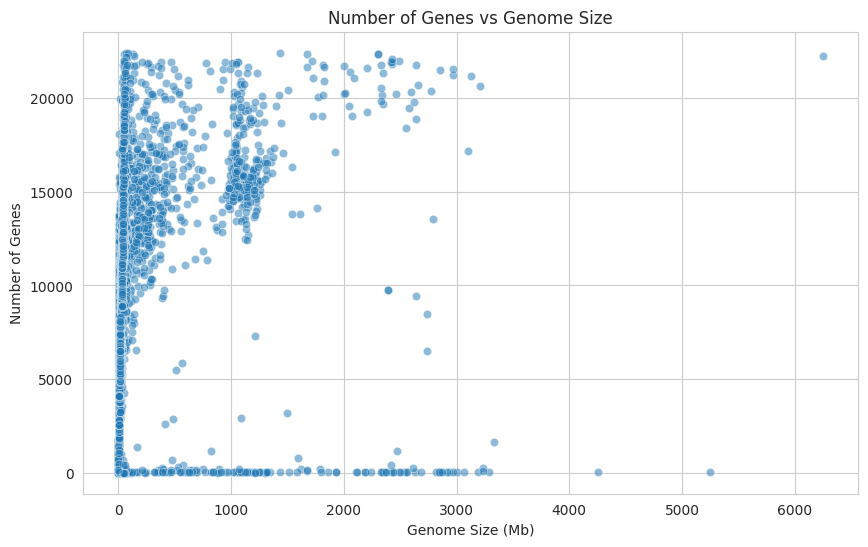

The correlation between genome size and the number of genes is: 0.25


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `filtered_data` is the DataFrame from previous steps

# For this example, we'll assume the column names are 'Genes' and 'Size (Mb)' based on previous code
genes_column = 'Genes'
size_column = 'Size (Mb)'

# Scatter plot to visualize the relationship between genome size and number of genes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x=size_column, y=genes_column, alpha=0.5)
plt.title('Number of Genes vs Genome Size')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()

# Calculate the correlation between genome size and number of genes
correlation = filtered_data[[size_column, genes_column]].corr().iloc[0, 1]

# Print the correlation
print(f"The correlation between genome size and the number of genes is: {correlation:.2f}")


# Problem 7(e): What are the distinct clusters in the eukaryote data (5 points):

You would now like to investigate what is happening with the Eukaryotes data points. If you plotted the above relationship you will see there is something interesting about the eukaryotes - they form two separate cluster of data points.  You can use the metadata available the dataframe to color the points.

Generate a plot which would highlight the what is going on with the two cluster of points in the Eukaryotes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-24-4f799d85e0e6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eukaryotes_filtered['Cluster'] = kmeans.fit_predict(eukaryotes_scaled)
<ipython-input-24-4f799d85e0e6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eukar

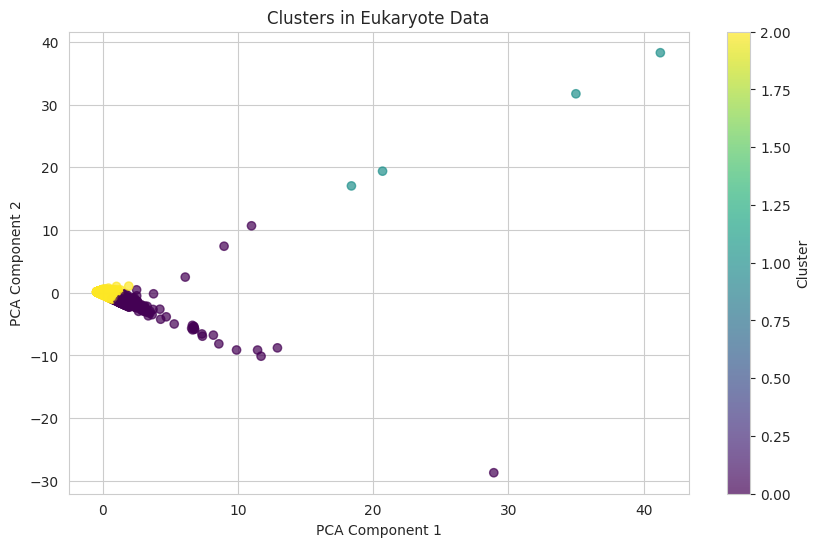

Cluster centers in the original feature space:
[[2.88867661e+03 4.10512050e+04]
 [1.90954000e+03 3.30769600e+06]
 [1.92919950e+02 1.45945986e+04]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `eukaryotes` is the DataFrame with eukaryote data

# Preprocess data: select relevant columns and handle missing values
features = ['Size (Mb)', 'Genes']  # Example features, adjust as needed

# Convert columns to numeric, forcing any non-convertible values to NaN
eukaryotes[features] = eukaryotes[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or non-numeric data
eukaryotes_filtered = eukaryotes.dropna(subset=features)

# Standardize features
scaler = StandardScaler()
eukaryotes_scaled = scaler.fit_transform(eukaryotes_filtered[features])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
eukaryotes_filtered['Cluster'] = kmeans.fit_predict(eukaryotes_scaled)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
eukaryotes_pca = pca.fit_transform(eukaryotes_scaled)
eukaryotes_filtered['PCA1'] = eukaryotes_pca[:, 0]
eukaryotes_filtered['PCA2'] = eukaryotes_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(eukaryotes_filtered['PCA1'], eukaryotes_filtered['PCA2'], c=eukaryotes_filtered['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters in Eukaryote Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Print cluster centers (in original feature space)
print("Cluster centers in the original feature space:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
